In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Data reading and cleaning
file_path = "occupation_age.csv"  
df = pd.read_csv(file_path)


In [4]:
# Extract the year column
year_cols = sorted([col for col in df.columns if col.isdigit()], key=int)

In [5]:
# Convert the value to floating point
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Hiring Occupation EDA

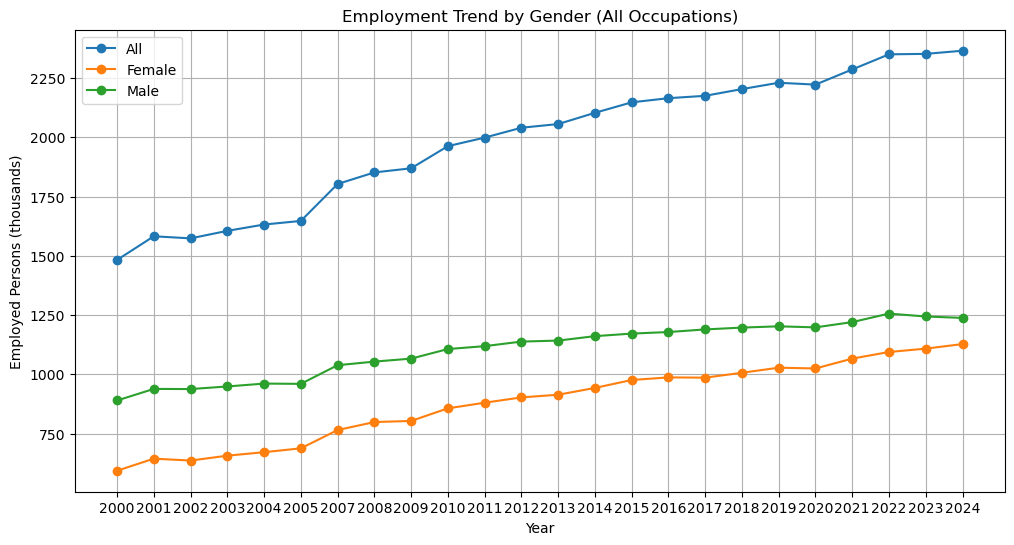

In [6]:
#1. Overall Employment Trend and Employment by gender
df_sex = df[(df["Occupation"]=="All Occupations") & 
            (df["Age Group"]=="All Ages")]
plt.figure(figsize=(12,6))
for sex, grp in df_sex.groupby("Sex"):
    plt.plot(year_cols, grp[year_cols].values.flatten(), marker="o", label=sex)
plt.title("Employment Trend by Gender (All Occupations)")
plt.xlabel("Year")
plt.ylabel("Employed Persons (thousands)")
plt.legend()
plt.grid(True)
plt.show()


From 2000 to 2024, overall employment in all occupations showed a steady upward trend, with total employment increased from around 1.5 million to over 2.3 million.  

Male employment is higher than female employment, though the gap gradually narrowed, indicating increasing female participation in the workforce.

 

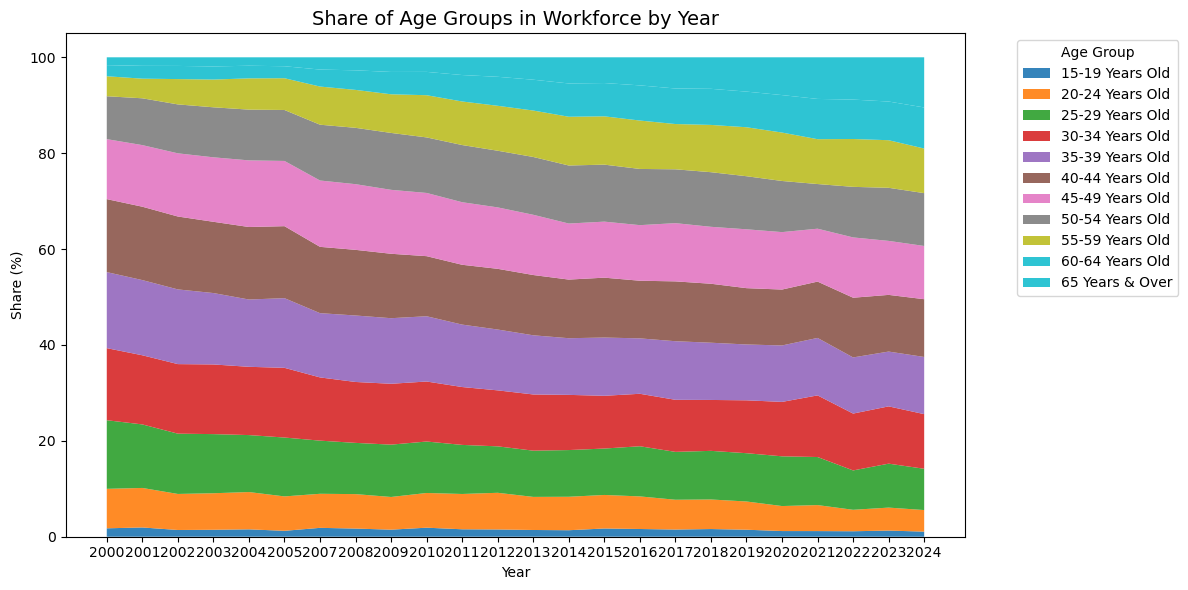

In [7]:
# 2. Filter dataset: keep only total occupation and both sexes
df_age_total = df[
    (df["Occupation"] == "All Occupations") &
    (df["Sex"] == "All") &
    (df["Age Group"] != "All Ages")
]

# 2. Get all distinct age groups and define color palette
age_groups = sorted(df_age_total["Age Group"].unique())
colors = cm.tab10(np.linspace(0, 1, len(age_groups)))   # use a diverse colormap

# 3. Calculate percentage share of each age group per year
df_age_share = df_age_total.set_index("Age Group")[year_cols]
df_age_share = df_age_share.div(df_age_share.sum(axis=0), axis=1) * 100


# 4. Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    year_cols,
    df_age_share.values,
    labels=age_groups,
    colors=colors,
    alpha=0.9
)

# 5. Chart formatting
plt.title("Share of Age Groups in Workforce by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

The chart illustrates how the composition of Singapore’s workforce by age group has evolved from 2000 to 2024.

Key findings are:

1, Younger age groups (15–24 years) have declined, indicating fewer young individuals entering the labor market, likely due to longer education pathways and delayed workforce entry.

2, The core working-age groups (30–49 years) continue to make up the largest share of the workforce, though their proportion has slightly decreased over time as the population ages.

3, Older workers (50 years and above) show a steady and notable increase in workforce share, especially among those 60–64 and 65+, reflecting active aging policies and longer employment participation.



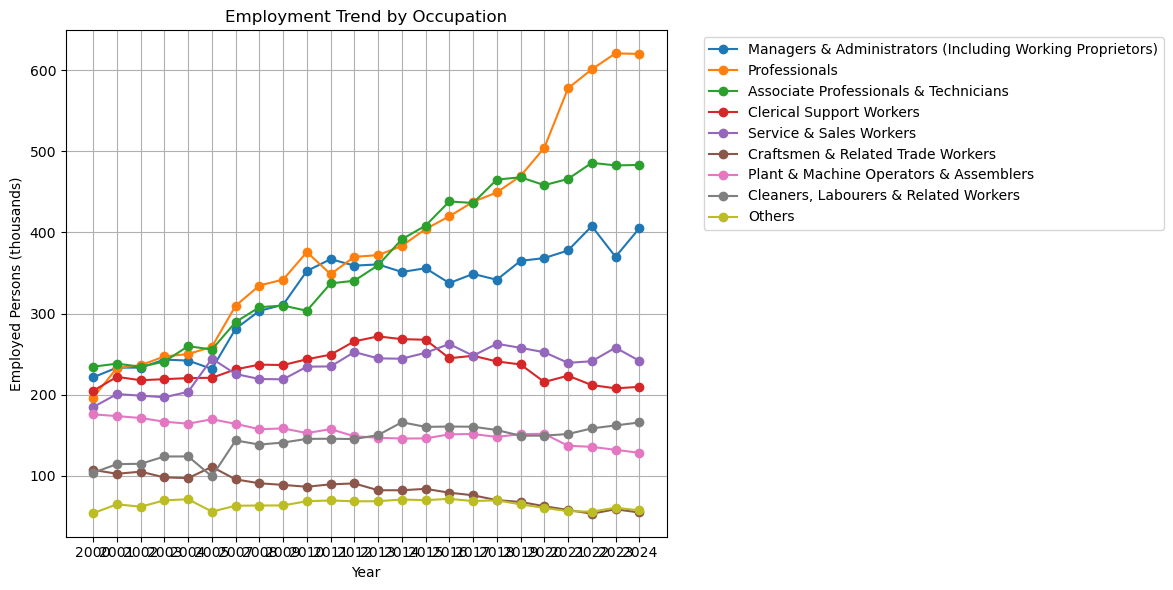

In [8]:
#3.Employment Trend by Occupation
plt.figure(figsize=(12,6))
df_occ = df[(df["Age Group"]=="All Ages") & 
            (df["Sex"]=="All") & 
            (df["Occupation"]!="All Occupations")]
for _, row in df_occ.iterrows():
    plt.plot(year_cols, row[year_cols].values.flatten(), label=row["Occupation"], marker="o")
plt.title("Employment Trend by Occupation")
plt.xlabel("Year")
plt.ylabel("Employed Persons (thousands)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows divergence in employment growth across occupational groups over the past two decades.

1, Professionals have seen the most rapid growth, rising sharply after 2015 and becoming the largest occupational group by 2024.

2, Associate Professionals & Technicians also show strong expansion, reflecting the growing demand for skilled technical roles in Singapore’s economy.

3, Managers & Administrators have maintained a steady increase, indicating continuous growth in leadership and management positions.

4, In contrast, Clerical Support Workers, Craftsmen, and Plant & Machine Operators have either stagnated or declined, suggesting a shift away from manual and routine jobs toward technical occupations.





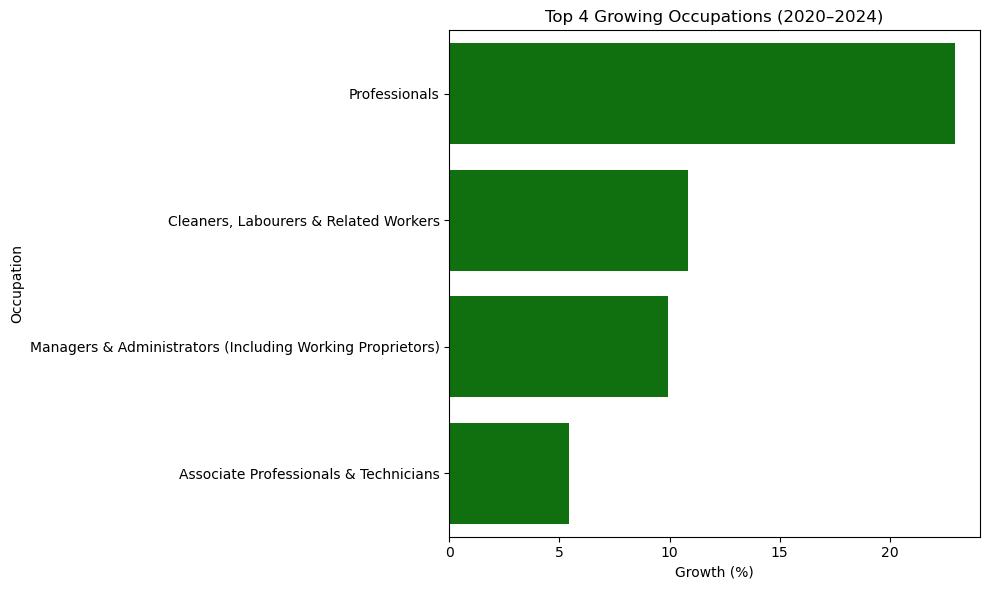

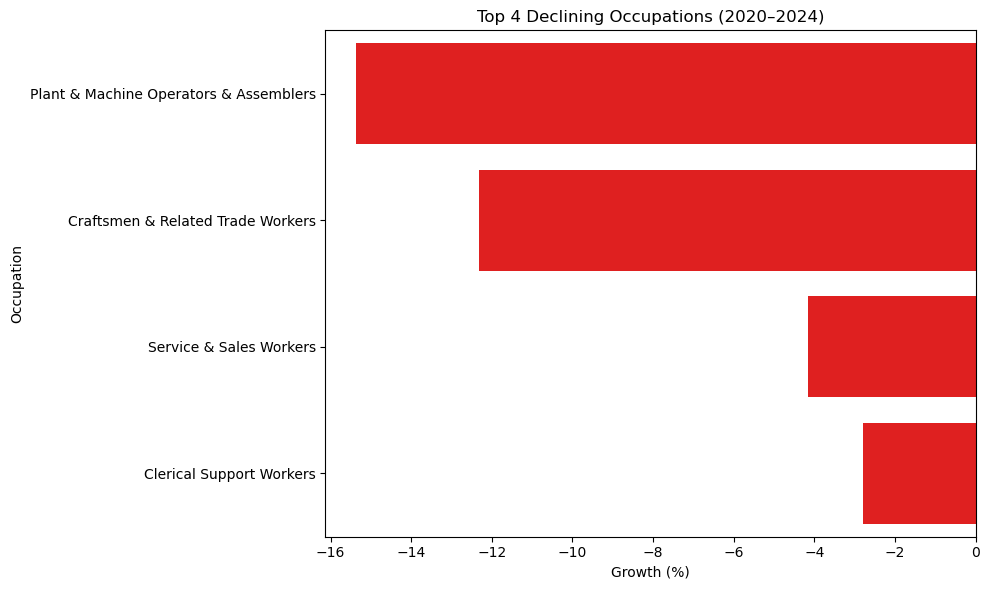

In [9]:
#4.Top 4 Growing & Declining Occupations

start_year = "2020"
end_year = "2024"

df_occ_growth = df[
    (df["Age Group"] == "All Ages") &
    (df["Occupation"]!="Others") &
    (df["Sex"] == "All") &
    (df["Occupation"] != "All Occupations")
].copy()

# Converting Data Types
df_occ_growth[start_year] = pd.to_numeric(df_occ_growth[start_year], errors="coerce")
df_occ_growth[end_year] = pd.to_numeric(df_occ_growth[end_year], errors="coerce")

# Calculating growth and growth rate
df_occ_growth["Absolute Growth"] = df_occ_growth[end_year] - df_occ_growth[start_year]
df_occ_growth["Growth %"] = (df_occ_growth["Absolute Growth"] / df_occ_growth[start_year]) * 100

# Sort by and select the top 4 growing and declining occupations
df_top_growth = df_occ_growth.sort_values("Growth %", ascending=False).head(4)
df_top_decline = df_occ_growth.sort_values("Growth %", ascending=True).head(4)

# Top 4 Growth Occupations
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_growth, x="Growth %", y="Occupation", color="green")
plt.title("Top 4 Growing Occupations (2020–2024)")
plt.xlabel("Growth (%)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

# Top 4 Declining Occupations
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_decline, x="Growth %", y="Occupation", color="red")
plt.title("Top 4 Declining Occupations (2020–2024)")
plt.xlabel("Growth (%)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()


#### Fast-Growing Occupations
1, Professionals recorded the highest growth, Managers & Administrators also expanded steadily.

2, Associate Professionals & Technicians grew moderately.

3, Cleaners & Labourers show growth mainly due to service demand, reflecting Singapore’s ageing population and urban services needs.
#### Declining Occupations
Plant & Machine Operators and Craftsmen & Trade Workers declined sharply, while Service & Sales Workers and Clerical Support Workers also saw contraction.
### Findings
Singapore’s workforce is moving from labor-intensive to knowledge-intensive employment.  
Future opportunities will focus on professional, managerial, and technical fields, while manual and routine work continues to shrink.

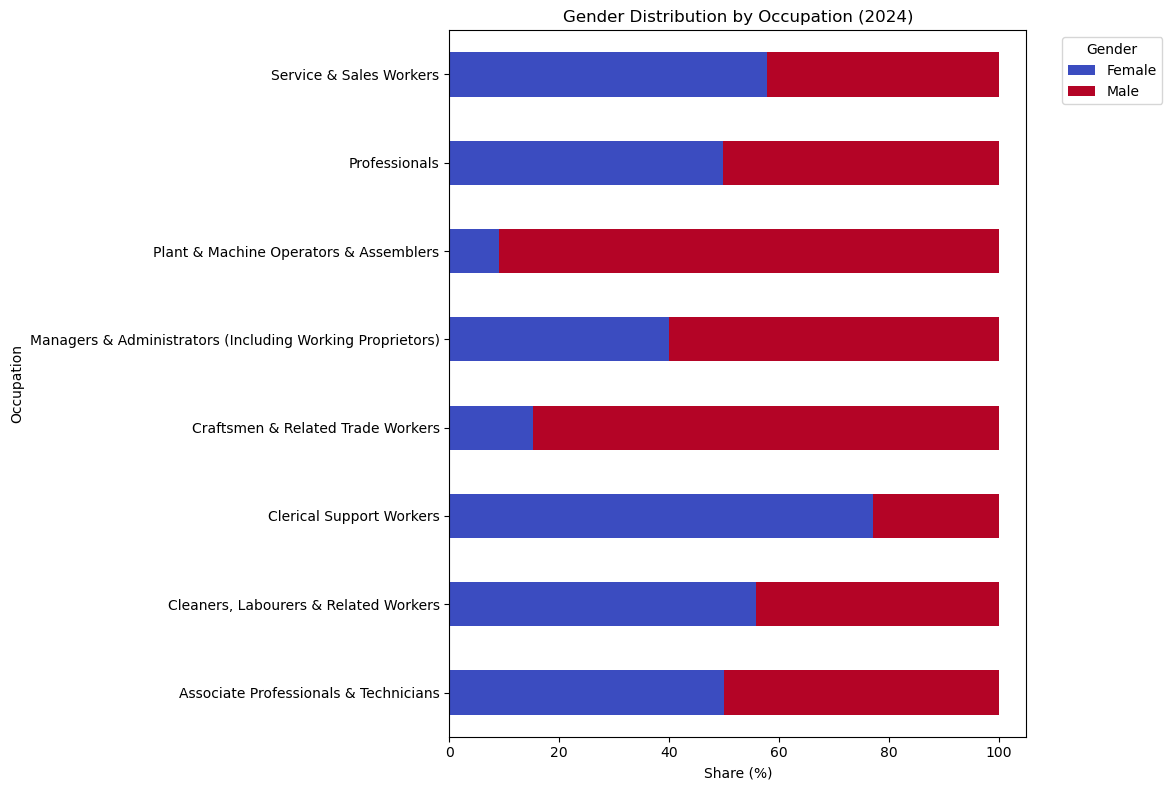

In [10]:
#5.Male/Female Ratio by Occupation

latest_year = "2024"

df_gender_occ = df[(df["Occupation"]!="All Occupations") & 
                   (df["Age Group"]=="All Ages") & 
                   (df["Occupation"]!="Others") & 
                   (df["Sex"]!="All")]

df_gender_occ_latest = df_gender_occ[["Occupation","Sex",latest_year]].copy()
df_gender_occ_latest[latest_year] = pd.to_numeric(df_gender_occ_latest[latest_year], errors="coerce")

pivot_gender_occ = df_gender_occ_latest.pivot_table(index="Occupation", 
                                                    columns="Sex", 
                                                    values=latest_year, 
                                                    aggfunc="sum").fillna(0)

# Calculate the ratio
pivot_gender_occ_pct = pivot_gender_occ.div(pivot_gender_occ.sum(axis=1), axis=0) * 100

pivot_gender_occ_pct.plot(kind="barh", stacked=True, figsize=(12,8), colormap="coolwarm")
plt.title(f"Gender Distribution by Occupation ({latest_year})")
plt.xlabel("Share (%)")
plt.ylabel("Occupation")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Overall Insight:**  
In 2024, Singapore’s workforce remains gender-diverse but unevenly distributed across occupations, with males dominating most technical and manual roles, while females are more concentrated in support and service-related positions.  

**Male-Majority Occupations:**  
Roles that involve physical labor or machinery operation, such as Craftsmen & Related Trade Workers and Plant & Machine Operators & Assemblers, are predominantly male.
Managers & Administrators also show a slight male majority, though the gender gap is narrower compared to manual jobs.  

**Female-Majority Occupations:**  
Clerical Support Workers and Service & Sales Workers have a higher proportion of female employees, indicating stronger female participation in administrative and customer-oriented roles.  

**Gender-Balanced or Skill-Oriented Roles:**  
Occupations such as Professionals and Associate Professionals & Technicians exhibit a more balanced gender composition, suggesting that skillsets and qualifications play a more significant role than gender in these knowledge-based fields.


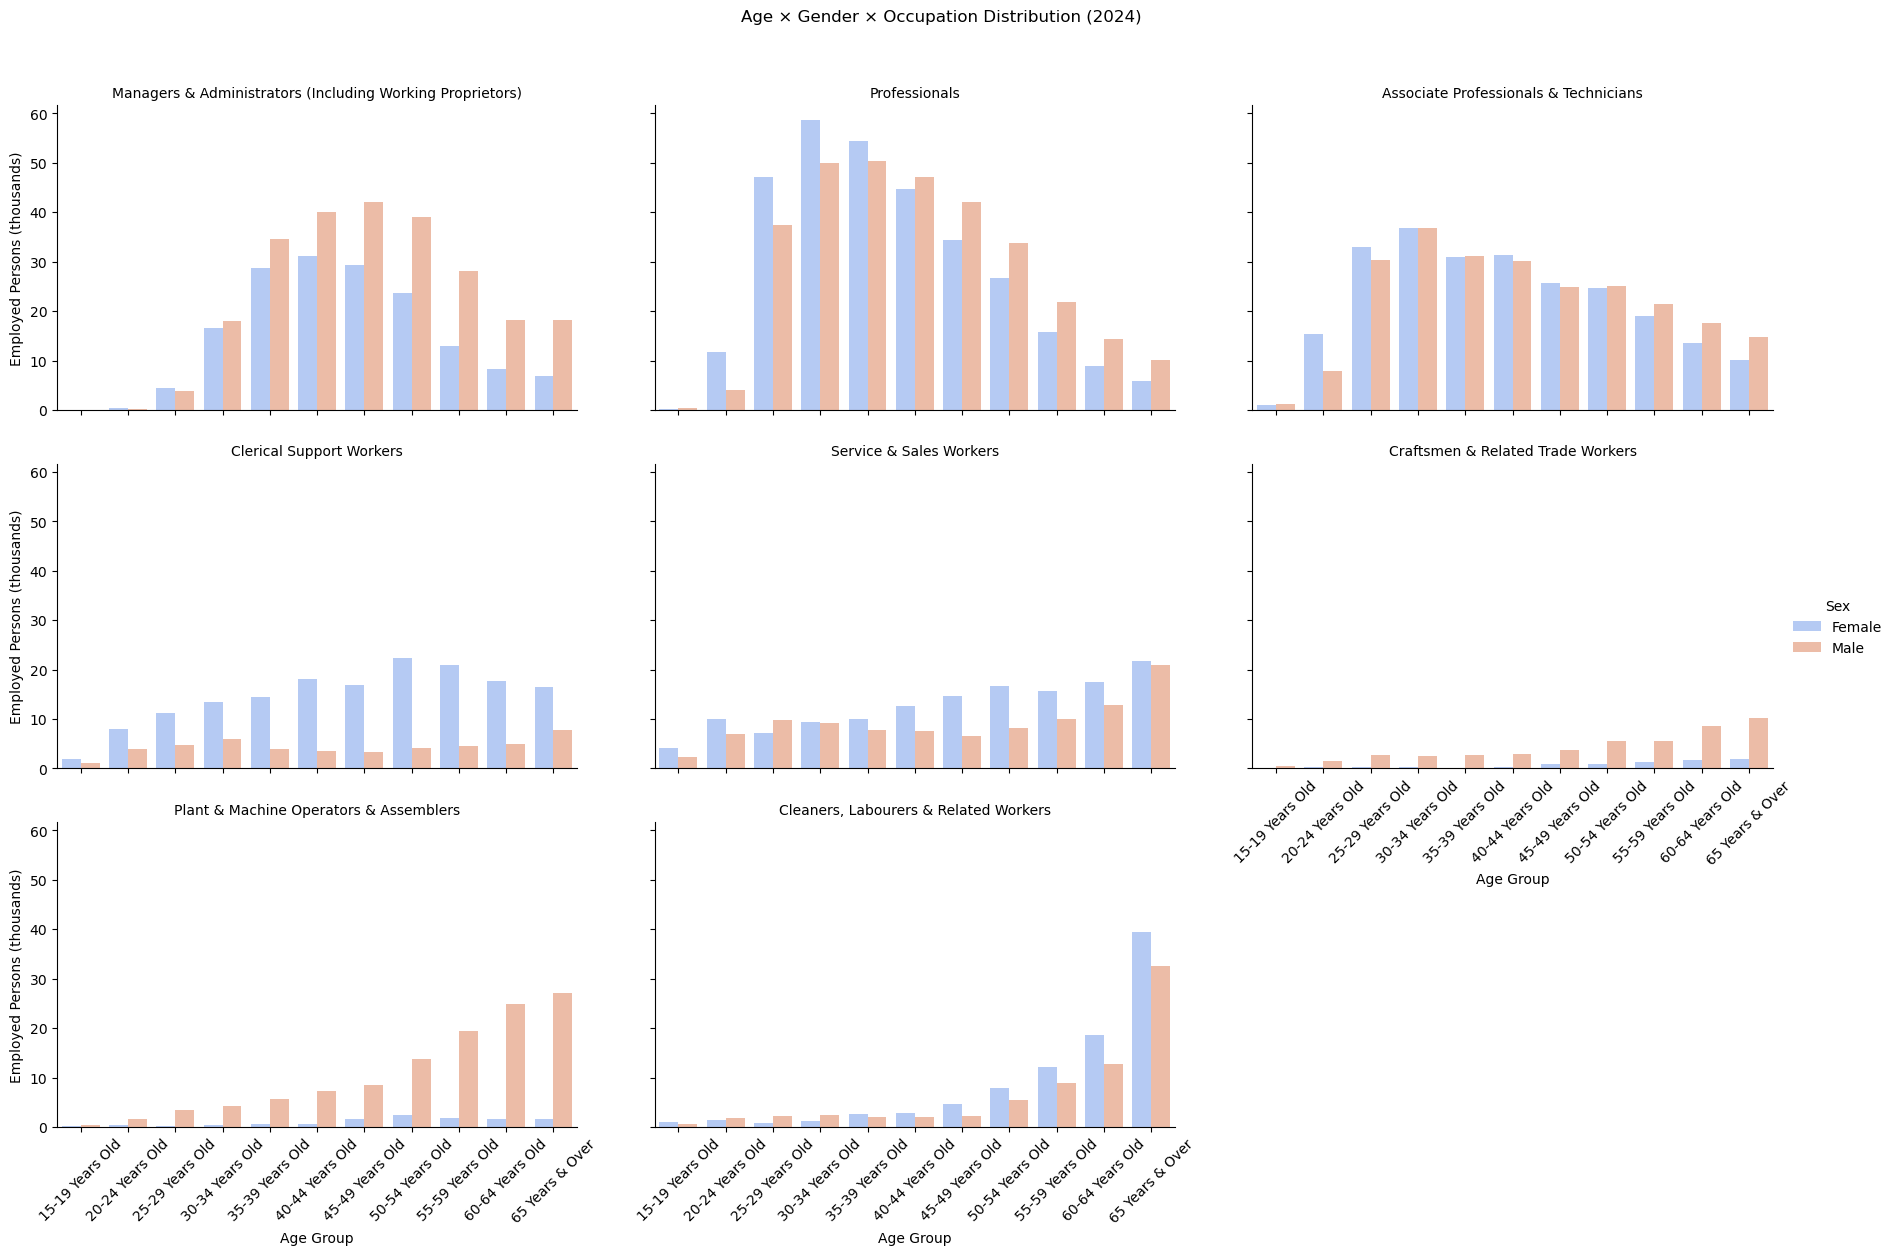

In [11]:
# 6.Occupation × Age × Gender
latest_year = "2024"

selected_occ = df[(df["Sex"]!="All") & (df["Age Group"]!="All Ages")]["Occupation"].unique()

df_age_sex_occ = df[(df["Occupation"].isin(selected_occ)) & 
                     (df["Occupation"]!="Others") &
                     (df["Occupation"]!="All Occupations") &
                    (df["Sex"]!="All") & 
                    (df["Age Group"]!="All Ages")][["Occupation","Age Group","Sex",latest_year]]

df_age_sex_occ[latest_year] = pd.to_numeric(df_age_sex_occ[latest_year], errors="coerce")


g = sns.catplot(data=df_age_sex_occ, 
                x="Age Group", y=latest_year, hue="Sex", 
                col="Occupation", kind="bar", col_wrap=3, 
                height=4, aspect=1.5, palette="coolwarm")

g.set_titles("{col_name}")
g.set_axis_labels("Age Group", "Employed Persons (thousands)")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle(f"Age × Gender × Occupation Distribution ({latest_year})")
plt.show()

**Overall Summary**
The 2024 distribution reveals that while overall participation is balanced in younger age groups, distinct gender patterns emerge as workers advance through their careers.
- **Gender Concentration:** Females are more represented in Clerical Support and Service & Sales roles, whereas males are more prevalent in manual and machinery-related occupations such as Craftsmen and Plant & Machine Operators.
- **Managerial & Professional Roles:** In Managers & Administrators, gender balance is relatively even among younger employees but becomes more male-skewed at older ages. This may reflect generational differences or career progression trends.
- **Age Structure:** Most occupations are concentrated in the 30–54 age range, with fewer young entrants and a gradual increase of older workers in physically demanding or routine jobs.

**Suggestions:** For young people, understanding these dynamics can guide smarter career planning, and to be aware of how gender representation may evolve over time within different career paths.By aligning their choices with these insights, young workers can build careers that are both sustainable and adaptive in an evolving job market.